In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import utils
import featurizer
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

CALIBRATION_FILE = "N_matrix_trial9.mat"
DATA_FILE = "crashing_into_wall/5/2016.03.06_19.18.30_trial_5_imudata.txt"
df = utils.process_data_files(DATA_FILE, CALIBRATION_FILE)

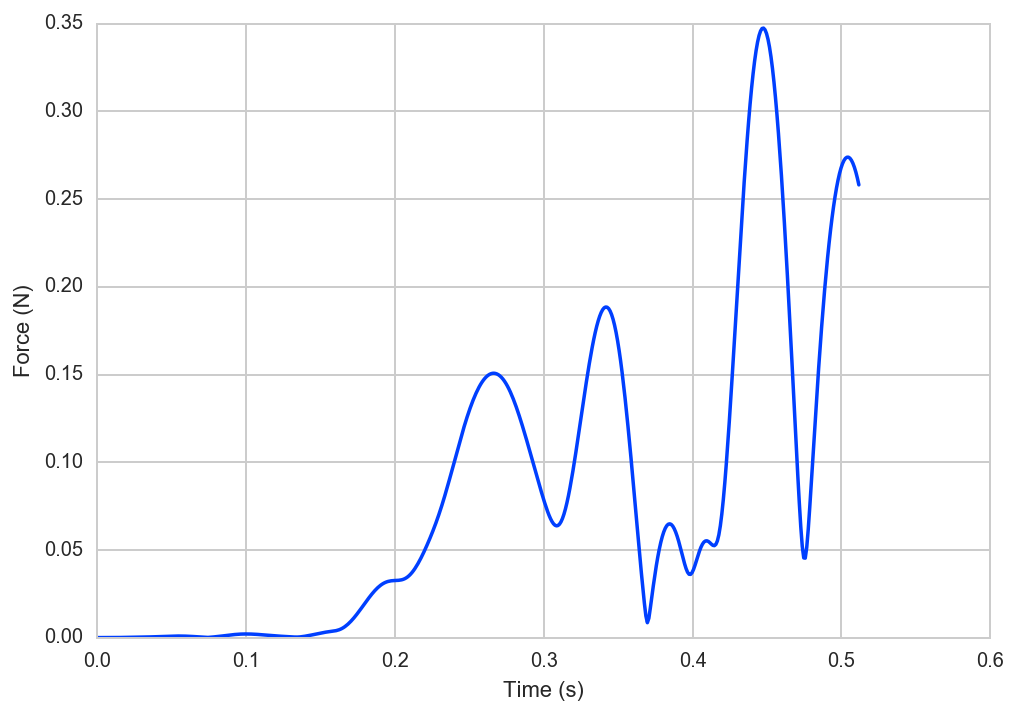

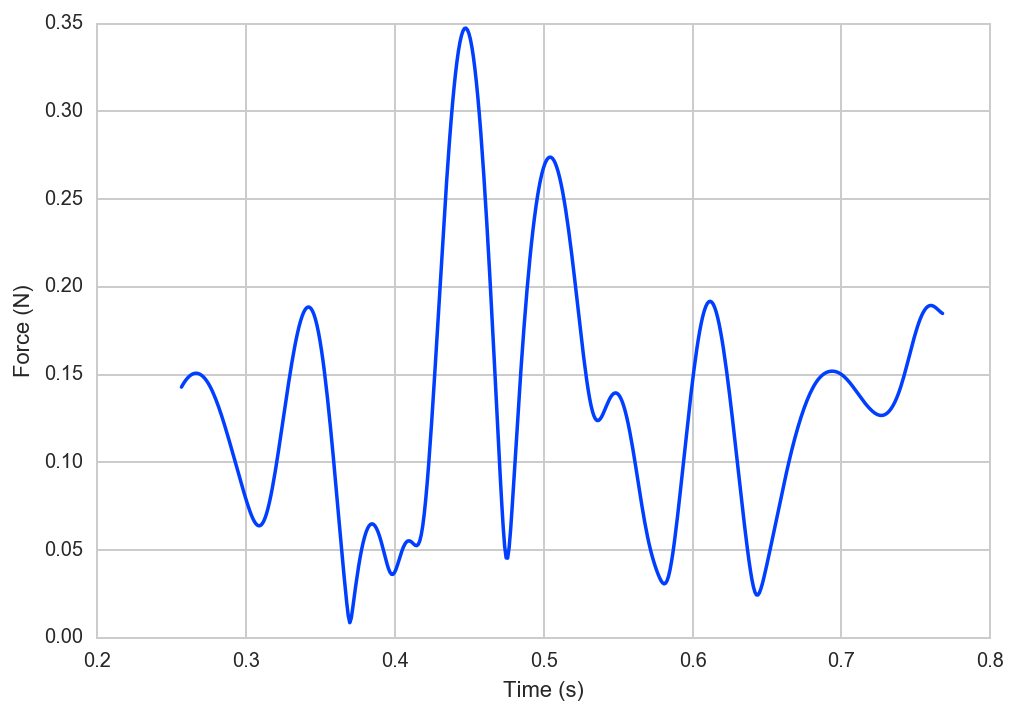

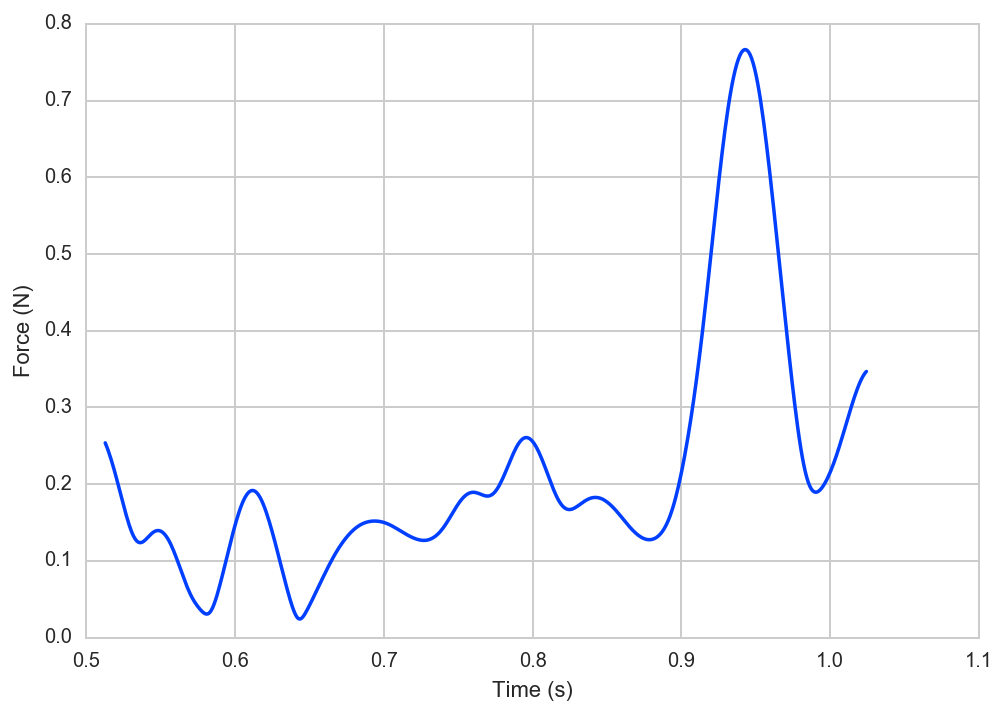

In [2]:
df_seg = featurizer.segment(df)

for df in df_seg:
    plt.plot(df["time"], df["F_mag"])
    plt.xlabel("Time (s)")
    plt.ylabel("Force (N)")
    plt.show()

FFT Frequency domain entropy: (1.18191495929-0.337764082862j) Energy: 671.389021989
RFFT Frequency domain entropy: 1.49223035221 Energy: 671.388976172


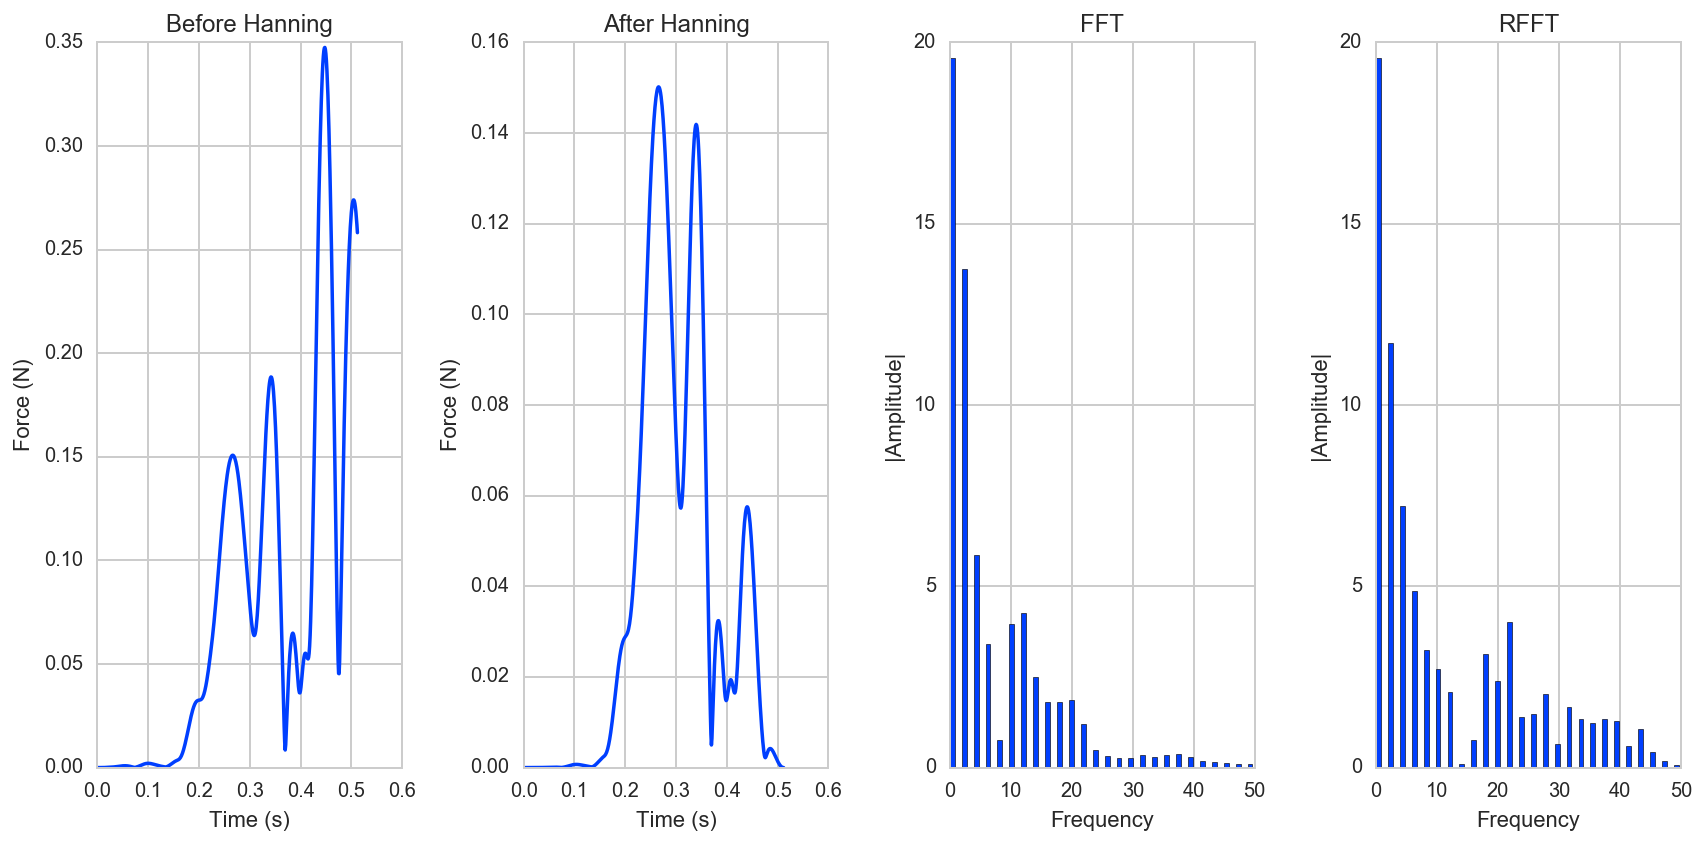

FFT Frequency domain entropy: (0.665327438294+0.291102657559j) Energy: 2228.85404468
RFFT Frequency domain entropy: 1.39018767748 Energy: 2228.85401779


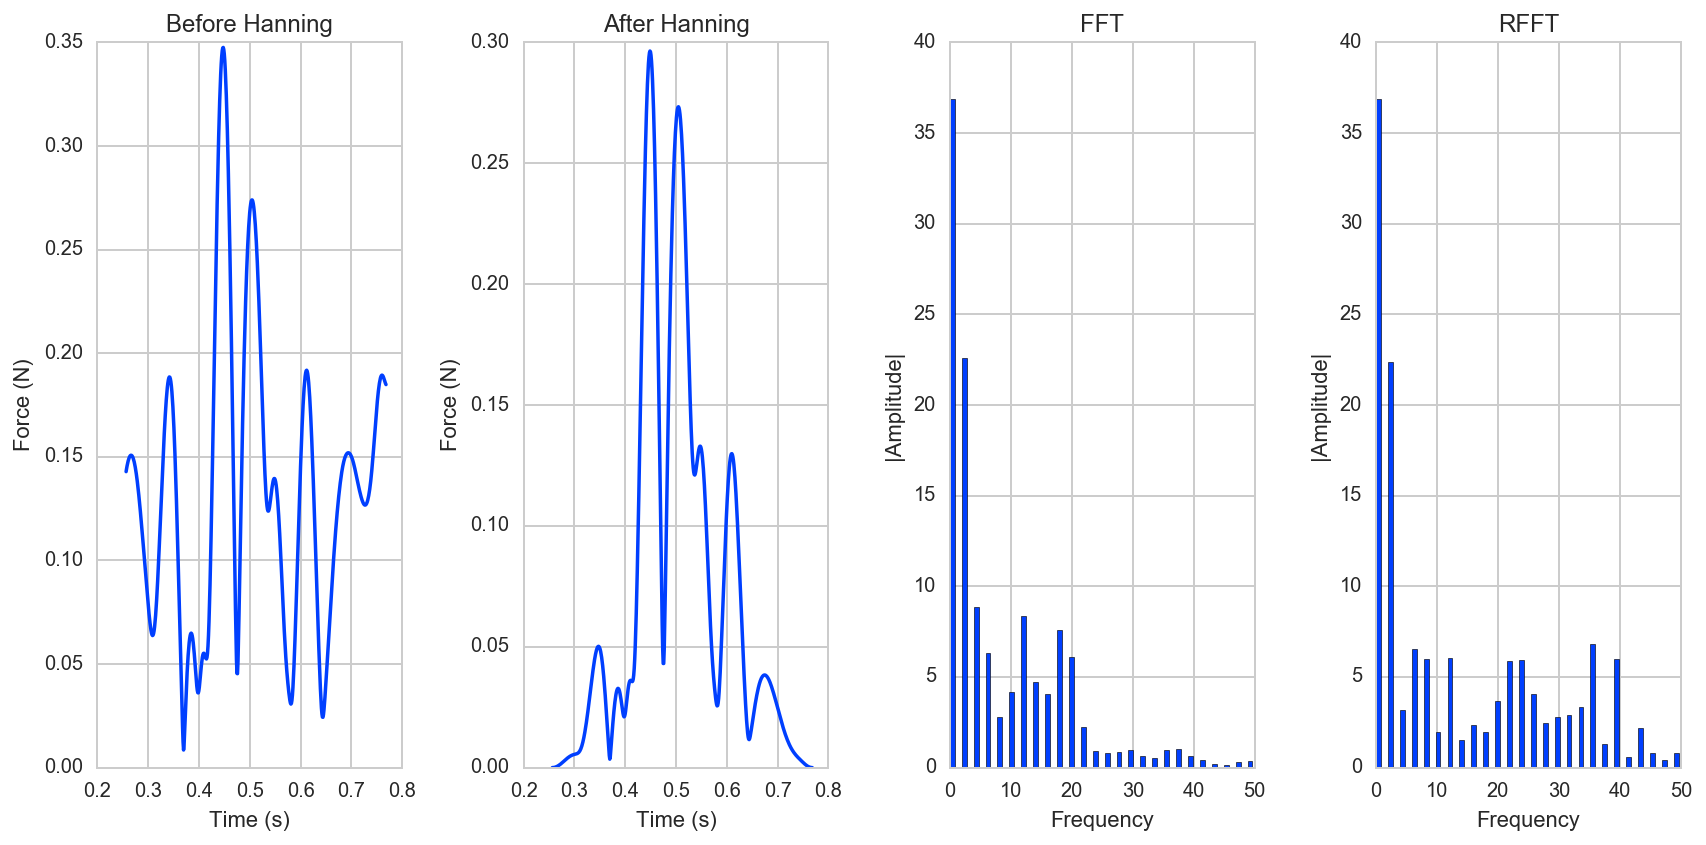

FFT Frequency domain entropy: (0.598660454131-0.182316681499j) Energy: 2969.38323776
RFFT Frequency domain entropy: 0.879440973492 Energy: 2969.38323776


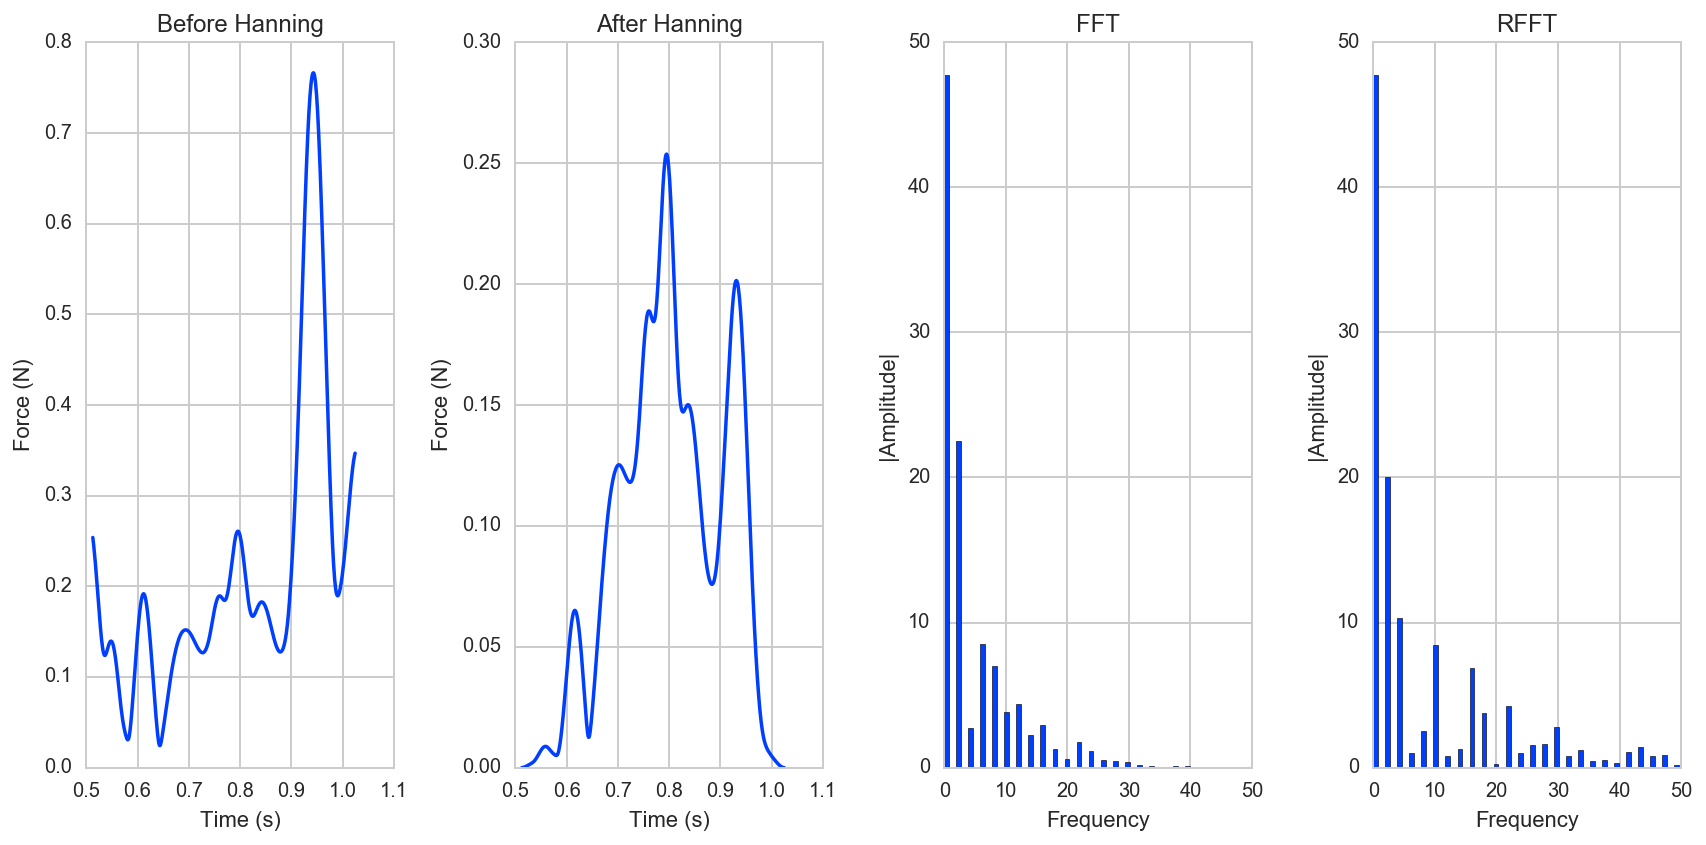

In [3]:
w = signal.hanning(512)

for df in df_seg:
    fft, freq = featurizer.fft_freq(df["F_mag"])
    rfft, rfreq = featurizer.rfft_freq(df["F_mag"])
    print "FFT Frequency domain entropy:", featurizer.freq_domain_entropy(fft), "Energy:", featurizer.energy(fft)
    print "RFFT Frequency domain entropy:", featurizer.freq_domain_entropy(rfft), "Energy:", featurizer.energy(rfft)
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 4, 1)
    plt.plot(df["time"], df["F_mag"])
    plt.xlabel("Time (s)")
    plt.ylabel("Force (N)")
    plt.title("Before Hanning")
    plt.subplot(1, 4, 2)
    plt.plot(df["time"], df["F_mag"] * w)
    plt.xlabel("Time (s)")
    plt.ylabel("Force (N)")
    plt.title("After Hanning")
    plt.subplot(1, 4, 3)
    plt.bar(freq, np.abs(fft))
    plt.xlim([0, 50])
    plt.xlabel("Frequency")
    plt.ylabel("|Amplitude|")
    plt.title("FFT")
    plt.subplot(1, 4, 4)
    plt.bar(freq, np.abs(rfft))
    plt.xlim([0, 50])
    plt.xlabel("Frequency")
    plt.ylabel("|Amplitude|")
    plt.title("RFFT")
    plt.tight_layout()
    plt.show()